In [1]:
np.random.seed(55)

# 在计算机的内存中一次性存储20个数值, return numbers+evenly spaced
x = np.linspace(start=0, stop=1, num=20)
y = np.sqrt(x) + (0.2 * np.random.rand(20) - 0.1)

In [2]:
# NumPy模块中random模块的rand()函数, 随机变量服从连续型均匀分布, 随机变量的所有可能取值是[0, 1)
np.random.rand(10)

array([0.39688175, 0.64365722, 0.02045331, 0.80808454, 0.4296133 ,
       0.55854652, 0.77911129, 0.40255712, 0.90799492, 0.64996961])

二阶多项式对应函数表达式: $y = c_0 + c_1x^1 + c_2x^2$

In [3]:
# 在上述公式中, c0, c1和c2是函数表达式中的常数项, x是自变量, y是因变量
y0 = x ** 2  # => c0和c1都是0, c2是1

In [4]:
np.polyfit(x=x, y=y0, deg=2)

array([1.00000000e+00, 2.18697767e-17, 1.61618518e-17])

In [5]:
polynomil_expression = np.poly1d(c_or_r=np.polyfit(x=x, y=y0, deg=2))
print(polynomil_expression)

   2
1 x + 2.187e-17 x + 1.616e-17


In [6]:
polynomil_expression(-1)

1.0

In [7]:
def plot_polynomial_fit(x, y, deg):
    """绘制样本点(x, y)在二维空间中的分布情况. 然后使用不同的多项式模型来拟合样本点, 绘制多项式模型对应的函数的图像
    @param x: 样本点的特征变量
    @param y: 样本点的标签
    """
    # 使用最小二乘法求解多项式模型中的参数
    coefficients = np.polyfit(x=x, y=y, deg=deg)
    # 通过求解多项式模型中的参数, 来构建函数表达式
    polynomial_expression = np.poly1d(c_or_r=coefficients)
    t = np.linspace(start=0, stop=1, num=200)
    # 绘制图像, 散点图
    plt.scatter(x=x, y=y, marker='o', c='red')
    plt.plot(t, polynomial_expression(t), '-')
    plt.plot(t, np.sqrt(t), 'r--')
    # plt.show()

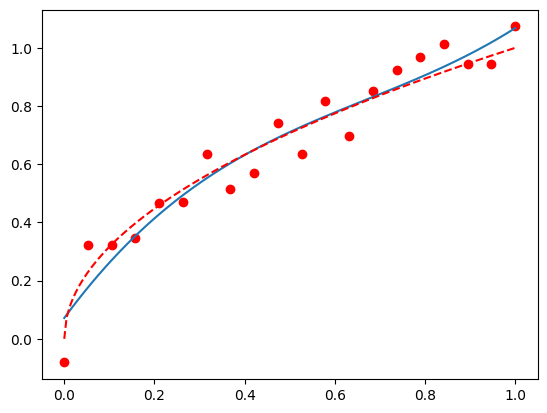

In [8]:
plot_polynomial_fit(x=x, y=y, deg=3)

In [9]:
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [10]:
y

array([-0.08137834,  0.32374692,  0.32121484,  0.34586425,  0.46505623,
        0.47009802,  0.63447756,  0.51519701,  0.57055523,  0.74167921,
        0.63576199,  0.81602922,  0.6965472 ,  0.85083261,  0.92213694,
        0.96824046,  1.01478525,  0.94525429,  0.94379231,  1.073417  ])

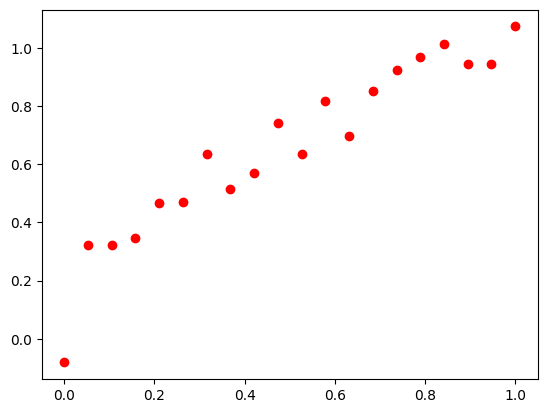

In [11]:
plt.scatter(x, y, marker='o', c='red')

<Figure size 3600x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'under fitting')

<Axes: >

Text(0.5, 1.0, 'fitting')

<Axes: >

Text(0.5, 1.0, 'over fitting')

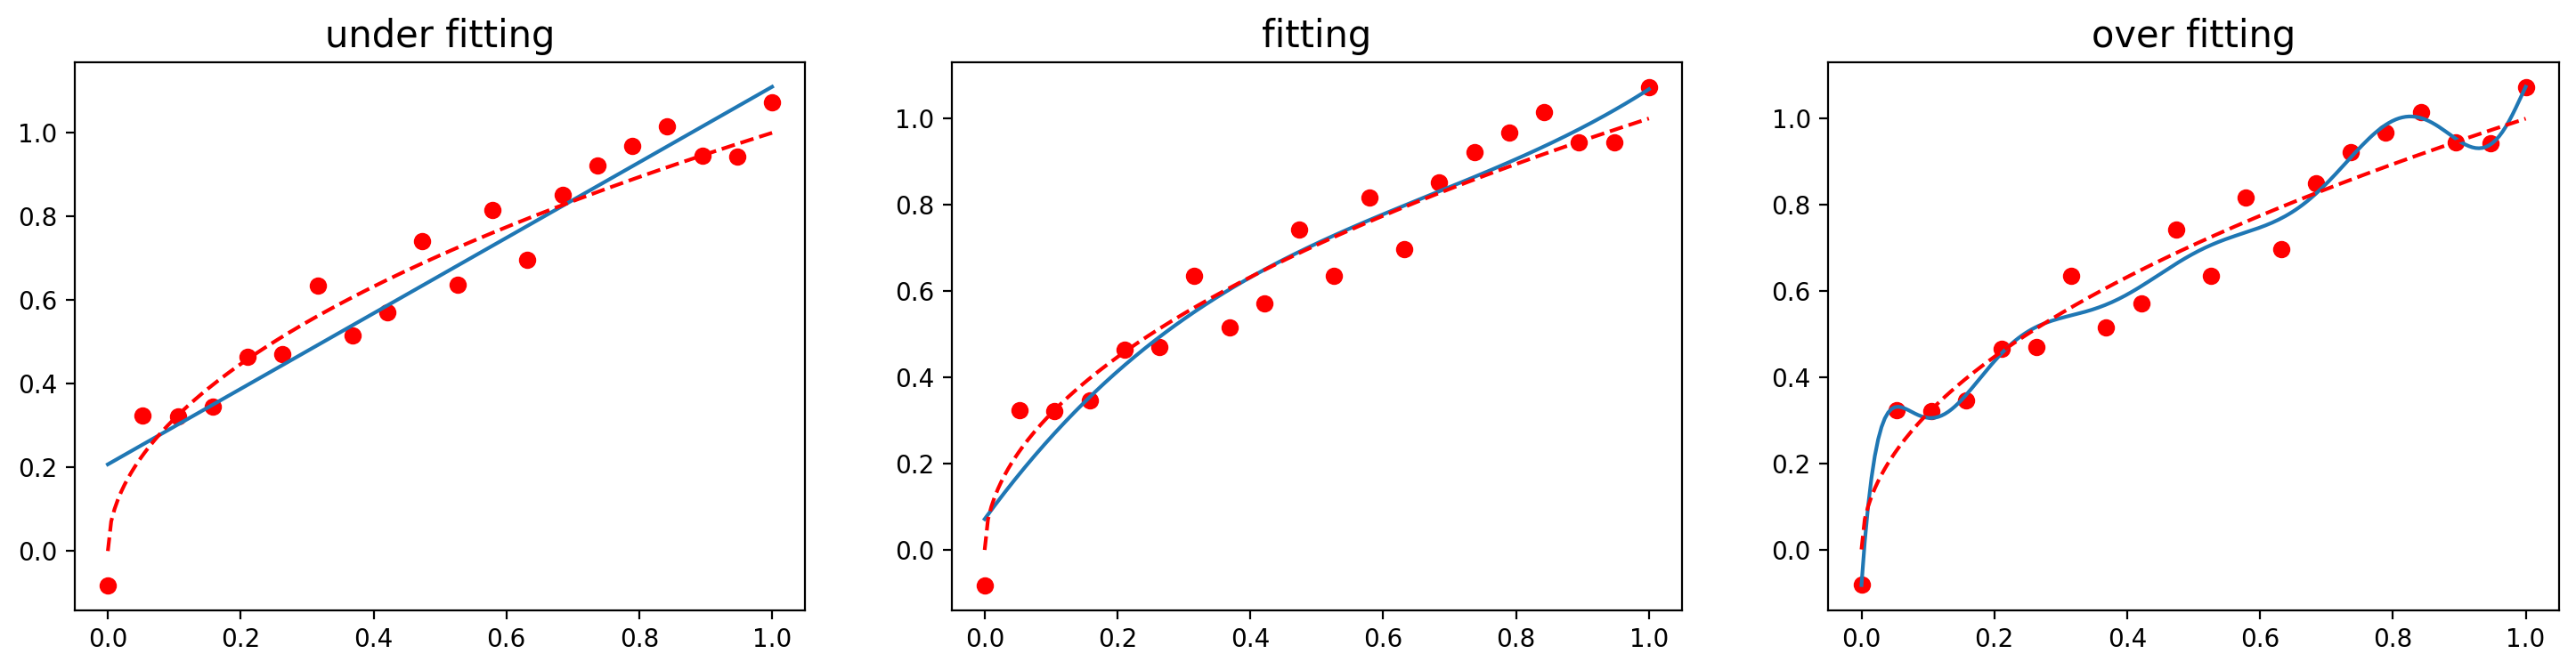

In [12]:
# 假设人为观测值中特征变量与标签的关系分别可以用1阶, 3阶, 10阶多项式对应的函数关系表示
degs = [1, 3, 10]
plt.figure(figsize=(18, 4), dpi=200)
titles = ["under fitting", "fitting", "over fitting"]
for i, deg in enumerate(degs):
    plt.subplot(1, 3, i+1)  # nrows, ncols, index
    plot_polynomial_fit(x=x, y=y, deg=deg)
    plt.title(titles[i], fontsize=15)

假设特征变量X1和X2和标签y之间的因果关系为$y=2x_1^2 - x_2^2$

In [13]:
torch.manual_seed(55)

# 加载数据集
X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

<Axes: >

<Axes: >

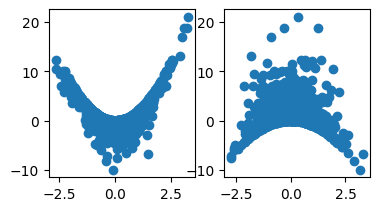

In [14]:
plt.subplot(235)
plt.scatter(x=X[:,0], y=y)

plt.subplot(236)
plt.scatter(x=X[:,1], y=y)

In [15]:
X

tensor([[ 1.8616,  0.9035],
        [ 1.3395,  1.2005],
        [ 1.0070,  0.2379],
        ...,
        [-0.0973, -0.4635],
        [ 0.1802, -0.3851],
        [-0.2370, -0.9159]])

In [16]:
# 如果一个数据集以特征变量和标签分开的形式存储, 则先将特征变量和标签整合在一起. 形成一个完整的数据集
# 将一个完整的数据集按照一定的比例拆分成为训练数据集和测试数据集
# 再分别按照给定的样本的大小将训练数据集和测试数据集分别拆分为若干个互不相交的子数据集
dataset_train, dataset_test = split_loader(X=X, y=y)

In [17]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNet(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, out_features=1):
        super(GeoffNet, self).__init__()

        self.output_linear = nn.Linear(in_features=in_features, out_features=out_features)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 输出层
        # 1.整合信息
        z_hat = self.output_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        return z_hat

# 实例化模型
net = GeoffNet()

In [18]:
torch.manual_seed(55)

# 选择合适的损失函数
criterion = nn.MSELoss()

# 选择合适的优化器
optimizer = optim.SGD(params=net.parameters(), lr=0.03)

# 在计算机的内存中逐个存储多个数值, 选择列表数据结构
losses_train = []
losses_test = []

n_epochs = 20
for i_epoch in range(n_epochs):
    # 训练模型
    fit(n_epochs=i_epoch, batched_dataset=dataset_train, model=net, criterion=criterion, optimizer=optimizer)

    # 1.计算当前训练完成的模型以模型的参数在训练数据集上的模型性能
    losses_train.append(calc_mse(dataset=dataset_train, model=net).detach().numpy())
    losses_test.append(calc_mse(dataset=dataset_test, model=net).detach().numpy())

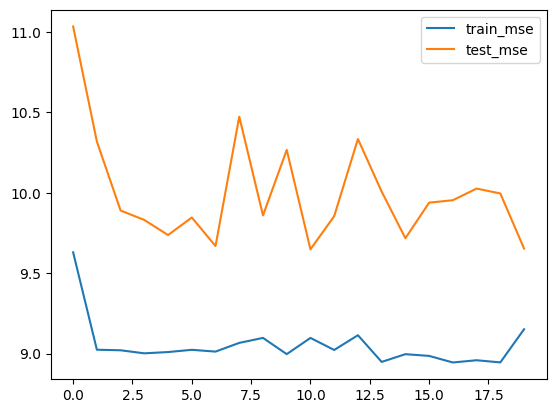

In [19]:
# 绘制模型的性能变化的折线图(点, 线)
plt.plot(list(range(n_epochs)), losses_train, label="train_mse")
plt.plot(list(range(n_epochs)), losses_test, label="test_mse")
plt.legend(loc="upper right")
plt.show()

In [20]:
def calc_train_test_losses(dataset_train, dataset_test, n_epochs, model, criterion, optimizer, task="reg", evaluation=calc_mse):
    """记录模型在训练过程中在训练数据集和测试数据集的性能表现
    @param n_epochs: 对完整的数据集学习的遍数
    @param dataset_train: 训练数据集
    @param dataset_test: 测试数据集
    @param model: 参数初始化后的模型
    @param criterion: 选择合适的损失函数
    @param optimizer: 选择合适的优化器
    @param task: 任务类型
    @param evaluation: 在给定任务下的模型性能评估指标计算方法

    @return: 模型在每一遍的训练过程中在训练数据集和测试数据集上的模型性能评估指标
    """
    # 在计算机的内存中逐个存储多个数值 => 选择列表数据结构
    losses_train = []
    losses_test = []

    for i_epoch in range(n_epochs):
        # 模型进行训练
        fit(batched_dataset=dataset_train, n_epochs=i_epoch, model=model, criterion=criterion, optimizer=optimizer, task=task)
        # 对当前完成训练的模型分别计算在训练数据集和测试数据集上的模型性能评估指标
        losses_train.append(evaluation(dataset=dataset_train, model=model).detach())
        losses_test.append(evaluation(dataset=dataset_test, model=model).detach())

    return losses_train, losses_test

In [21]:
torch.manual_seed(55)

# 选择合适的损失函数
criterion = nn.MSELoss()

# 选择合适的优化器
optimizer = optim.SGD(params=net.parameters(), lr=0.03)

losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, model=net, criterion=criterion, optimizer=optimizer, task="reg", evaluation=calc_mse)

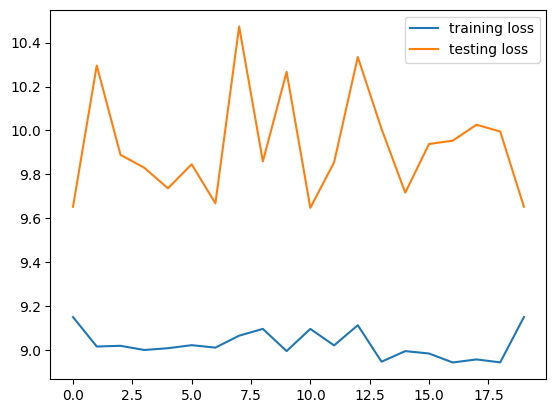

In [22]:
n_epochs = 20
plt.plot(list(range(n_epochs)), losses_train, label='training loss')
plt.plot(list(range(n_epochs)), losses_test, label='testing loss')
plt.legend(loc='upper right')
plt.show()

In [50]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNet(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, out_features=1):
        super(GeoffNet, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=4)
        self.output_linear = nn.Linear(in_features=4, out_features=out_features)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(z_hat)
        return z_hat

# 实例化模型
net = GeoffNet()

In [24]:
torch.manual_seed(55)

# 选择合适的损失函数
criterion = nn.MSELoss()

# 选择合适的优化器
optimizer = optim.SGD(params=net.parameters(), lr=0.03)

losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, model=net, criterion=criterion, optimizer=optimizer, task="reg", evaluation=calc_mse)

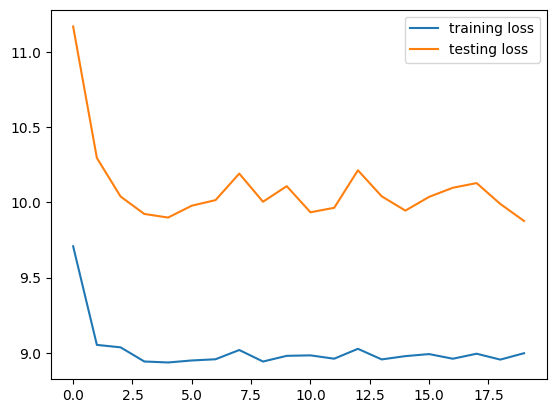

In [25]:
n_epochs = 20
plt.plot(list(range(n_epochs)), losses_train, label='training loss')
plt.plot(list(range(n_epochs)), losses_test, label='testing loss')
plt.legend(loc='upper right')
plt.show()

In [51]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=4, out_features=1, bias=False):
        super(GeoffNetSigmoid, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features, bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features, out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_sigmoid = GeoffNetSigmoid()

In [52]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=4, out_features=1, bias=False):
        super(GeoffNetTanh, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features, bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features, out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_tanh = GeoffNetTanh()

In [53]:
# 搭建深度神经网络模型的架构
torch.manual_seed(88)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=4, out_features=1, bias=False):
        super(GeoffNetReLU, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features, bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features, out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu = GeoffNetReLU()

In [36]:
# 在计算机的内存中一次性存储多个随机数, 随机变量服从标准的正态分布
t = torch.randn(size=(5, ))
t

tensor([ 0.6986,  0.5706, -0.2875, -1.3444,  0.7054])

In [37]:
torch.relu(t)

tensor([0.6986, 0.5706, 0.0000, 0.0000, 0.7054])

In [38]:
F.relu(t)

tensor([0.6986, 0.5706, 0.0000, 0.0000, 0.7054])

In [39]:
torch.sigmoid(t)

tensor([0.6679, 0.6389, 0.4286, 0.2068, 0.6694])

In [40]:
F.sigmoid(t)

tensor([0.6679, 0.6389, 0.4286, 0.2068, 0.6694])

In [41]:
torch.manual_seed(55)

# net = GeoffNet()
# net_sigmoid = GeoffNetSigmoid()
# net_tanh = GeoffNetTanh()
# net_relu = GeoffNetReLU()

models = [net, net_sigmoid, net_tanh, net_relu]
model_names = ["none", "sigmoid", "tanh", "relu"]

In [54]:
torch.manual_seed(55)

# 选择合适的损失函数
criterion = nn.MSELoss()

# 选择合适的优化器
# optimizer = optim.SGD(params=net.parameters(), lr=0.03)

n_epochs = 20
# 在计算机的内存中逐个存储多个数值, 选择张量数据结构 => 张量的维度, 形状和数据类型
mse_train = torch.zeros(size=(len(models), n_epochs), dtype=torch.float32)
mse_test = torch.zeros(size=(len(models), n_epochs), dtype=torch.float32)

for epochs in range(n_epochs):
    for i, model in enumerate(models):
        # 模型进行训练
        fit(batched_dataset=dataset_train, n_epochs=epochs, model=model, criterion=criterion, optimizer=optim.SGD(params=model.parameters(), lr=0.03))
        mse_train[i][epochs] = calc_mse(dataset=dataset_train, model=model).detach()
        mse_test[i][epochs] = calc_mse(dataset=dataset_test, model=model).detach()

In [55]:
mse_train

tensor([[ 9.0019,  9.0020,  8.9448,  8.9457,  9.0184,  8.9799,  8.9591,  8.9558,
          8.9916,  8.9953,  9.0010,  8.9646,  9.0053,  8.9588,  9.0205,  8.9408,
          8.9515,  8.9443,  8.9477,  9.0019],
        [ 9.0691,  8.9964,  8.9431,  8.9586,  8.9497,  8.9727,  8.9445,  8.9977,
          8.9638,  9.0300,  8.9757,  8.9493,  8.9502,  8.9572,  9.0080,  8.9632,
          8.9853,  9.0498,  8.9555,  9.0681],
        [10.0860,  9.7778,  9.7882,  9.8134,  9.7825,  9.8500,  9.8789, 10.0059,
          9.7462,  9.8103,  9.9142,  9.7763,  9.8529,  9.8226,  9.7771,  9.7617,
          9.8004,  9.7771,  9.8871, 10.0621],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan]])

In [56]:
len(mse_train[0])

20

In [57]:
mse_test

tensor([[10.1242, 10.1581,  9.9517,  9.9734, 10.1919, 10.1078,  9.9719, 10.0413,
         10.0385, 10.1322,  9.8863, 10.0713, 10.1626,  9.8448, 10.0598,  9.9048,
         10.0142, 10.0039, 10.0044, 10.1242],
        [ 9.9924, 10.1242, 10.0049,  9.9802,  9.9419,  9.9181, 10.0186,  9.9447,
         10.0628, 10.0217,  9.9256,  9.9813, 10.0491, 10.0774, 10.0038, 10.0979,
         10.1246, 10.2711,  9.9503,  9.9925],
        [11.9031, 11.2454, 10.9811, 10.9853, 11.1617, 10.9101, 11.4782, 11.0291,
         11.1572, 11.4522, 11.5346, 11.2490, 10.8933, 11.0721, 11.3247, 11.0482,
         11.2614, 11.2611, 11.5081, 11.8676],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan]])

Text(0.5, 1.0, 'training mse')

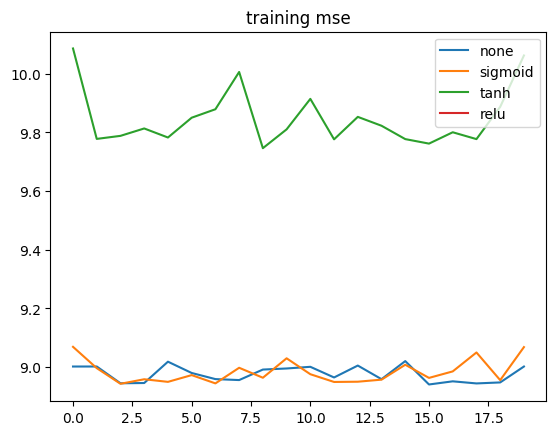

In [58]:
# 查看所有模型在训练数据集上的模型性能评估指标的变化
# RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
for i, name in enumerate(model_names):
    plt.plot(list(range(len(mse_train[i]))), mse_train[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse")

In [88]:
def fit(batched_dataset, n_epochs, model, criterion, optimizer, lr=0.03, task="reg"):
        """让模型拟合数据, 在训练过程中更新模型的参数, 使得损失函数值减小, 尽可能最小
        @param n_epochs: 对于一个完整的数据集进行学习的遍数
        @param batched_dataset: 将一个完整的数据集按照指定的样本容量划分为若干个互不相交的子集
        @param model: 模型
        @param criterion: 损失函数
        @param optimizer: 优化器

        @return: 完成训练流程的模型(不一定是性能最好的模型)
        """
        for i_epoch in range(n_epochs):
            for (i_X, i_y) in batched_dataset:
                # 1.前向传播, 计算以当前的模型参数对该批次的数据进行学习, 模型的预测输出标记
                z_hat = model.forward(i_X)
                # 2.计算损失, 计算模型的预测输出标记与真实标签之间的误差, 构建完整的计算图
                if task == "clf":
                    i_y = i_y.flatten().long()
                    
                loss = criterion(z_hat, i_y)
                # 3.反向传播, 计算以当前的模型参数对应的偏导函数表达式和值, 以确定各个模型的参数在对应维度上应该向哪个方向进行更新(该维度所在的正方向or负方向)
                loss.backward()
                # 4.更新模型的参数, 优化器根据梯度信息, 计算当前的模型参数在各个维度的已知方向上应该更新的数值
                optimizer.step()
                # 5.清空梯度信息
                optimizer.zero_grad()

In [89]:
def compare_models_performance(dataset_train, dataset_test, n_epochs, models, model_names, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03, task="reg", evaluation=calc_mse):
    """计算同一个任务的不同模型的性能评估指标
    @param dataset_train: 训练数据集
    @param dataset_test: 测试数据集
    @param n_epochs: 对完整的数据集学习的遍数
    @param models: 参数初始化后的多个模型
    @param model_names: 参数初始化后的多个模型的名称
    @param criterion: 选择合适的损失函数
    @param optimizer: 选择合适的优化器
    @param task: 任务类型
    @param evaluation: 在给定任务下的模型性能评估指标计算方法

    @return: 各个模型在每一遍的训练过程中在训练数据集和测试数据集上的模型性能评估指标
    """
    # 在计算机的内存中逐个存储多个数值, 选择张量数据结构 => 张量的维度, 形状和数据类型
    mse_train = torch.zeros(size=(len(models), n_epochs), dtype=torch.float32)
    mse_test = torch.zeros(size=(len(models), n_epochs), dtype=torch.float32)
    
    for epochs in range(n_epochs):
        for i, model in enumerate(models):
            # 模型进行训练
            fit(batched_dataset=dataset_train, n_epochs=epochs, model=model, criterion=criterion, optimizer=optimizer, lr=0.03, task=task)
            mse_train[i][epochs] = evaluation(dataset=dataset_train, model=model).detach()
            mse_test[i][epochs] = evaluation(dataset=dataset_test, model=model).detach()

    return mse_train, mse_test

In [62]:
# 搭建深度神经网络模型的架构
torch.manual_seed(88)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU2(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=False):
        super(GeoffNetReLU2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu2 = GeoffNetReLU2()

In [63]:
torch.manual_seed(55)

models = [net_relu, net_relu2]
model_names = ["net_relu", "net_relu2"]

evaluation = calc_mse
mse_train, mse_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, models=models, model_names=model_names, criterion=criterion, optimizer=optimizer, task="reg", evaluation=evaluation)

Text(0.5, 1.0, 'training mse')

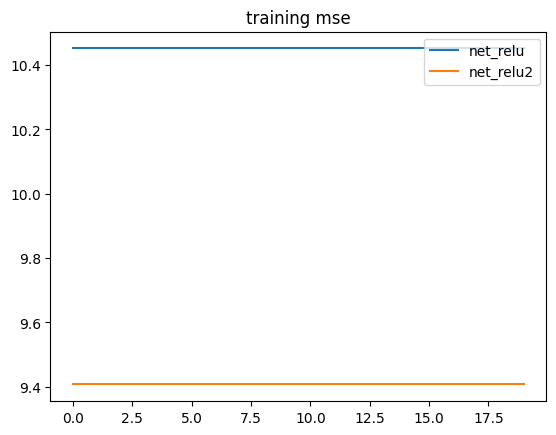

In [64]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'testing mse')

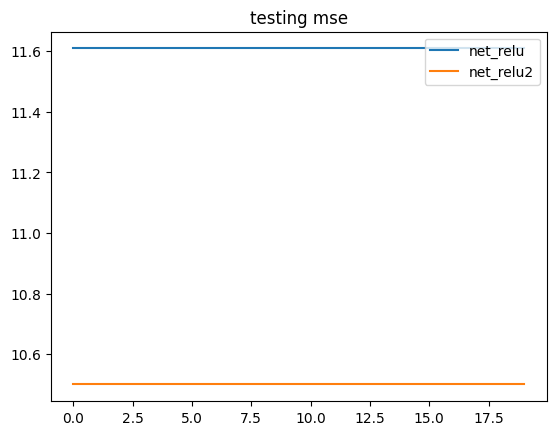

In [65]:
# 比较两个模型在测试数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_test[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("testing mse")
plt.show()

数据集中的特征变量和标签的相关关系为：$y=2x_1^2-x_2^2$

In [78]:
torch.manual_seed(55)

# 加载原始的数据集
X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

# 将特征变量和标签分开的数据集整理成特征变量和标签在一起的完整数据集
# 先将一个完整数据集按照指定的比例划分为训练数据集和测试数据集
# 再将训练数据集和测试数据集按照指定的子集的大小分别划分为若干个互不相交的子集
dataset_train, dataset_test = split_loader(X=X, y=y)

In [72]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=4, out_features=1, bias=True):
        super(GeoffNetReLU, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features, bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features, out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu = GeoffNetReLU()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU2(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=True):
        super(GeoffNetReLU2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu2 = GeoffNetReLU2()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu3 = GeoffNetReLU3()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU4(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU4, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden4_linear = nn.Linear(in_features=hidden_features[2], out_features=hidden_features[3], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[3], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 隐藏层第四层
        # 1.整合信息
        z_hat = self.hidden4_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu4 = GeoffNetReLU4()

In [73]:
torch.manual_seed(55)

models = [net_relu, net_relu2, net_relu3, net_relu4]
model_names = ["net_relu", "net_relu2", "net_relu2", "net_relu4"]

mse_train, mse_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, 
                                                       models=models, model_names=model_names,
                                                      criterion=criterion, optimizer=optimizer, task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse')

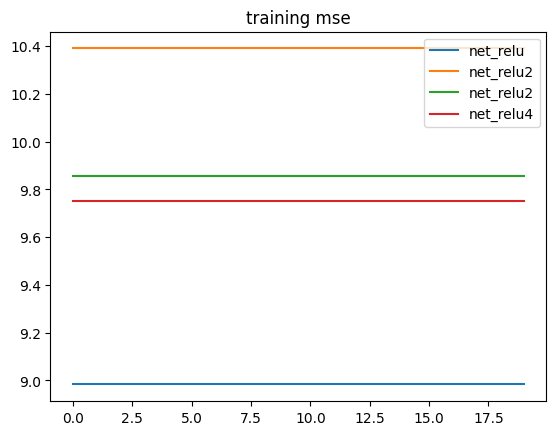

In [74]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'testing mse')

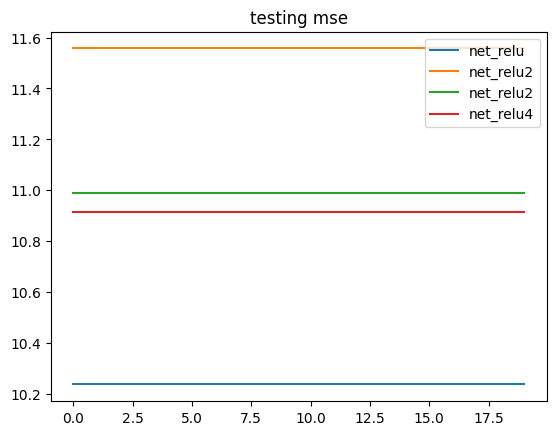

In [75]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_test[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("testing mse")
plt.show()

In [93]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=4, out_features=1, bias=False):
        super(GeoffNetSigmoid, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features, bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features, out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_sigmoid = GeoffNetSigmoid()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid2(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=True):
        super(GeoffNetSigmoid2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第二层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_sigmoid2 = GeoffNetSigmoid2()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetSigmoid3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_sigmoid3 = GeoffNetSigmoid3()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid4(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4, 4], out_features=1, bias=True):
        super(GeoffNetSigmoid4, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden4_linear = nn.Linear(in_features=hidden_features[2], out_features=hidden_features[3], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[3], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第三层-> 隐藏层第四层
        # 1.整合信息
        z_hat = self.hidden4_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_sigmoid4 = GeoffNetSigmoid4()

In [94]:
torch.manual_seed(55)

models = [net_sigmoid, net_sigmoid2, net_sigmoid3, net_sigmoid4]
model_names = ["net_sigmoid", "net_sigmoid2", "net_sigmoid3", "net_sigmoid4"]

# 选择合适的损失函数
criterion = nn.MSELoss()

# 选择合适的优化器
# optimizer = optim.SGD(params=net.parameters(), lr=0.03)

mse_train, mse_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, 
                                                       models=models, model_names=model_names,
                                                      criterion=criterion, optimizer=optim.SGD(params=model.parameters(), lr=0.03), task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse')

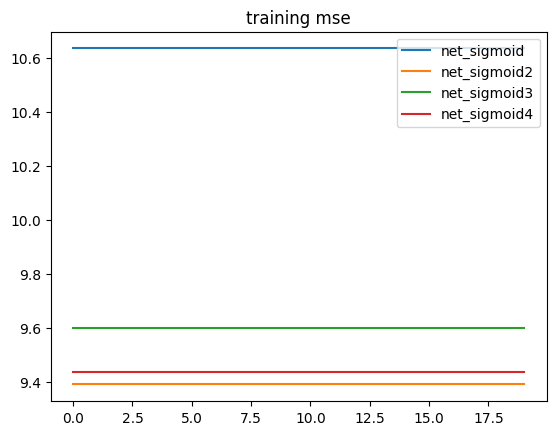

In [95]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'testing mse')

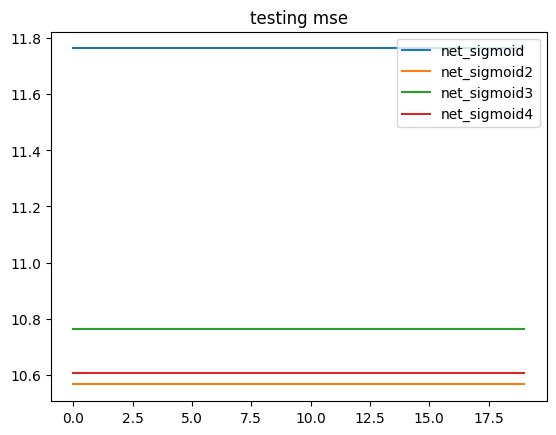

In [96]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_test[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("testing mse")
plt.show()

In [97]:
# 搭建深度神经网络模型的架构
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=4, out_features=1, bias=False):
        super(GeoffNetTanh, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features, bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features, out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_tanh = GeoffNetTanh()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh2(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=True):
        super(GeoffNetTanh2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第二层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_tanh2 = GeoffNetTanh2()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetTanh3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_tanh3 = GeoffNetTanh3()

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh4(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4, 4], out_features=1, bias=True):
        super(GeoffNetTanh4, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden4_linear = nn.Linear(in_features=hidden_features[2], out_features=hidden_features[3], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[3], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第三层-> 隐藏层第四层
        # 1.整合信息
        z_hat = self.hidden4_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_tanh4 = GeoffNetTanh4()

In [98]:
torch.manual_seed(55)

models = [net_tanh, net_tanh2, net_tanh3, net_tanh4]
model_names = ["net_tanh", "net_tanh2", "net_tanh3", "net_tanh4"]

# 选择合适的损失函数
criterion = nn.MSELoss()

# 选择合适的优化器
# optimizer = optim.SGD(params=net.parameters(), lr=0.03)

mse_train, mse_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, 
                                                       models=models, model_names=model_names,
                                                      criterion=criterion, optimizer=optim.SGD(params=model.parameters(), lr=0.03), task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse')

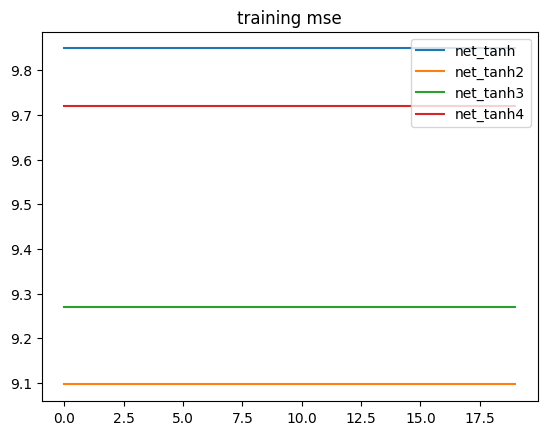

In [99]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'testing mse')

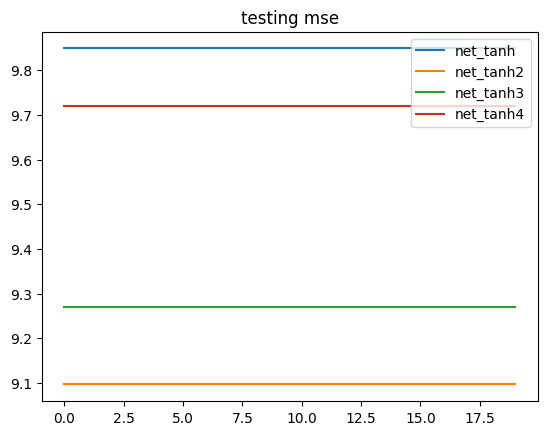

In [100]:
# 比较两个模型在训练数据集上的模型性能评估指标
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), mse_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("testing mse")
plt.show()